# **Importing Modules and Libraries**

In [ ]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle 
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# **Importing Datasets**

In [ ]:
#data = pd.read_csv('/content/drive/MyDrive/IoT_ML_Dataset/UNSW/UNSW_NB15.csv')
data = pd.read_csv('datasets/UNSW_NB15_whole.csv')

In [ ]:
data.head(n=5)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,...,1,3,0,0,0,2,3,0,Normal,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  object 
 2   service            257673 non-null  object 
 3   state              257673 non-null  object 
 4   spkts              257673 non-null  int64  
 5   dpkts              257673 non-null  int64  
 6   sbytes             257673 non-null  int64  
 7   dbytes             257673 non-null  int64  
 8   rate               257673 non-null  float64
 9   sttl               257673 non-null  int64  
 10  dttl               257673 non-null  int64  
 11  sload              257673 non-null  float64
 12  dload              257673 non-null  float64
 13  sloss              257673 non-null  int64  
 14  dloss              257673 non-null  int64  
 15  sinpkt             257673 non-null  float64
 16  di

In [ ]:
data.drop(columns=['service'], inplace=True, errors='ignore')


In [ ]:
data.isnull().sum()

dur                  0
proto                0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat           0
label                0
dtype: int6

In [ ]:
data.head()

,dur,proto,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,INT,2,0,496,0,90909.0902,254,0,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,INT,2,0,1762,0,125000.0003,254,0,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,INT,2,0,1068,0,200000.0051,254,0,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,INT,2,0,900,0,166666.6608,254,0,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,INT,2,0,2126,0,100000.0025,254,0,...,1,3,0,0,0,2,3,0,Normal,0


In [ ]:
data.shape

(257673, 43)

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(257673, 43)

In [ ]:
data['attack_cat'].value_counts()

attack_cat
Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: count, dtype: int64

In [ ]:
data['state'].value_counts()

state
FIN    117164
INT    116438
CON     20134
REQ      3833
RST        84
ECO        12
ACC         4
CLO         1
PAR         1
URN         1
no          1
Name: count, dtype: int64

In [ ]:
data

,dur,proto,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,INT,2,0,496,0,90909.090200,254,0,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,INT,2,0,1762,0,125000.000300,254,0,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,INT,2,0,1068,0,200000.005100,254,0,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,INT,2,0,900,0,166666.660800,254,0,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,INT,2,0,2126,0,100000.002500,254,0,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000009,udp,INT,2,0,114,0,111111.107200,254,0,...,13,24,0,0,0,24,24,0,Generic,1
257669,0.505762,tcp,FIN,10,8,620,354,33.612649,254,252,...,1,2,0,0,0,1,1,0,Shellcode,1
257670,0.000009,udp,INT,2,0,114,0,111111.107200,254,0,...,3,13,0,0,0,3,12,0,Generic,1
257671,0.000009,udp,INT,2,0,114,0,111111.107200,254,0,...,14,30,0,0,0,30,30,0,Generic,1


In [ ]:
#features = pd.read_csv('/content/drive/MyDrive/IoT_ML_Dataset/UNSW/UNSW_NB15_features.csv')
features = pd.read_csv('datasets/UNSW_NB15_features.csv')

In [ ]:
features.head()

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


In [ ]:
features['Type '] = features['Type '].str.lower()

In [ ]:
# selecting column names of all data types
nominal_names = features['Name'][features['Type ']=='nominal']
integer_names = features['Name'][features['Type ']=='integer']
binary_names = features['Name'][features['Type ']=='binary']
float_names = features['Name'][features['Type ']=='float']

In [ ]:
# selecting common column names from dataset and feature dataset
cols = data.columns
nominal_names = cols.intersection(nominal_names)
integer_names = cols.intersection(integer_names)
binary_names = cols.intersection(binary_names)
float_names = cols.intersection(float_names)

In [ ]:
# Converting integer columns to numeric
for c in integer_names:
  pd.to_numeric(data[c])

In [ ]:
# Converting binary columns to numeric
for c in binary_names:
  pd.to_numeric(data[c])

In [ ]:
# Converting float columns to numeric
for c in float_names:
  pd.to_numeric(data[c])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 43 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  object 
 2   state              257673 non-null  object 
 3   spkts              257673 non-null  int64  
 4   dpkts              257673 non-null  int64  
 5   sbytes             257673 non-null  int64  
 6   dbytes             257673 non-null  int64  
 7   rate               257673 non-null  float64
 8   sttl               257673 non-null  int64  
 9   dttl               257673 non-null  int64  
 10  sload              257673 non-null  float64
 11  dload              257673 non-null  float64
 12  sloss              257673 non-null  int64  
 13  dloss              257673 non-null  int64  
 14  sinpkt             257673 non-null  float64
 15  dinpkt             257673 non-null  float64
 16  sj

In [ ]:
data

,dur,proto,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,INT,2,0,496,0,90909.090200,254,0,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,INT,2,0,1762,0,125000.000300,254,0,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,INT,2,0,1068,0,200000.005100,254,0,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,INT,2,0,900,0,166666.660800,254,0,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,INT,2,0,2126,0,100000.002500,254,0,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000009,udp,INT,2,0,114,0,111111.107200,254,0,...,13,24,0,0,0,24,24,0,Generic,1
257669,0.505762,tcp,FIN,10,8,620,354,33.612649,254,252,...,1,2,0,0,0,1,1,0,Shellcode,1
257670,0.000009,udp,INT,2,0,114,0,111111.107200,254,0,...,3,13,0,0,0,3,12,0,Generic,1
257671,0.000009,udp,INT,2,0,114,0,111111.107200,254,0,...,14,30,0,0,0,30,30,0,Generic,1


# **Data Visualization**

## **Binary Classification**

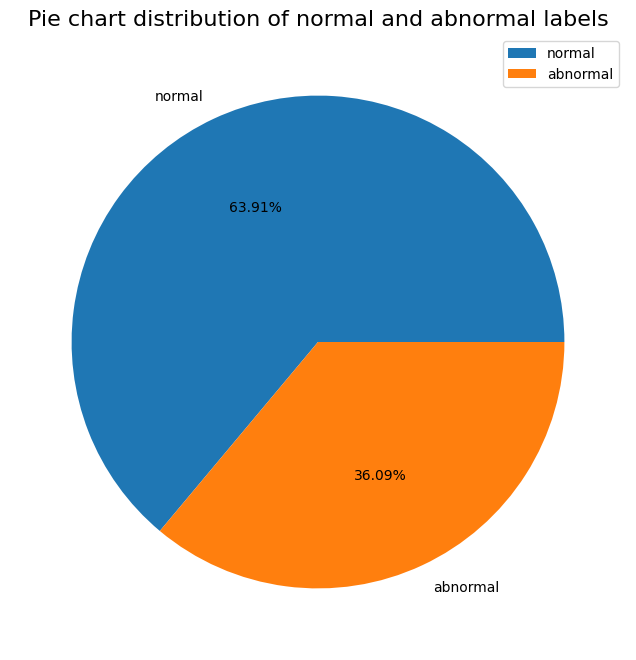

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(data.label.value_counts(),labels=['normal','abnormal'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.savefig('plots/Pie_chart_binary.png')
plt.show()

In [ ]:
num_col = data.select_dtypes(include='number').columns

# selecting categorical data attributes
cat_col = data.columns.difference(num_col)
cat_col = cat_col[1:]
cat_col

Index(['proto', 'state'], dtype='object')

In [ ]:
# creating a dataframe with only categorical attributes
data_cat = data[cat_col].copy()
data_cat.head()

,proto,state
0,udp,INT
1,udp,INT
2,udp,INT
3,udp,INT
4,udp,INT


In [ ]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [ ]:
data.shape

(257673, 43)

In [ ]:
data = pd.concat([data, data_cat],axis=1)

In [ ]:
data.shape

(257673, 187)

In [ ]:
data.drop(columns=cat_col,inplace=True)

In [ ]:
data.shape

(257673, 185)

## **label encoding and class distribution visualization**

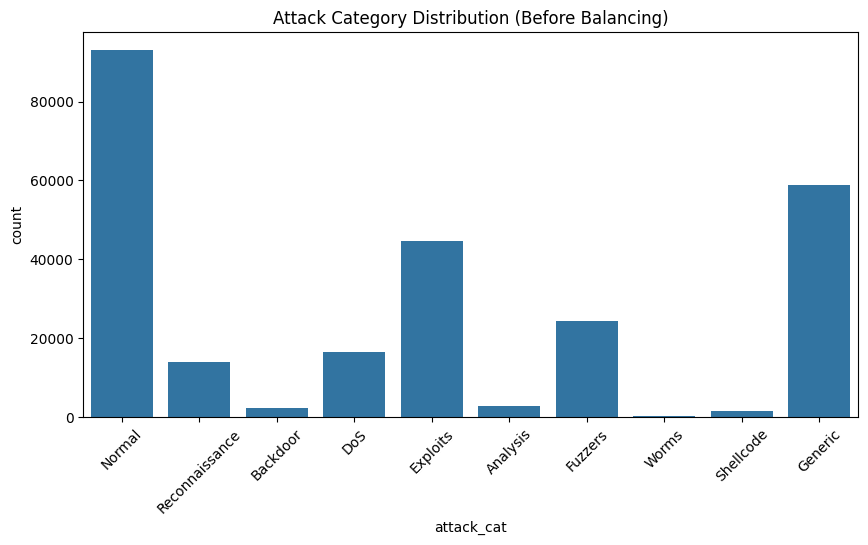

In [69]:
# Encode categorical labels
le = LabelEncoder()
data['label_encoded'] = le.fit_transform(data['attack_cat'])

# Check class distribution
plt.figure(figsize=(10,5))
sns.countplot(x='attack_cat', data=data)
plt.title("Attack Category Distribution (Before Balancing)")
plt.xticks(rotation=45)
plt.show()

# Features and labels
X = data.drop(['attack_cat', 'label_encoded'], axis=1)
y = data['label_encoded']


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


🔹 Baseline Model (Before SMOTE)
                precision    recall  f1-score   support

      Analysis       0.74      0.20      0.31       803
      Backdoor       0.63      0.08      0.15       699
           DoS       0.33      0.24      0.28      4906
      Exploits       0.65      0.83      0.73     13358
       Fuzzers       0.89      0.88      0.88      7274
       Generic       1.00      0.98      0.99     17661
        Normal       1.00      1.00      1.00     27900
Reconnaissance       0.92      0.76      0.83      4196
     Shellcode       0.67      0.58      0.62       453
         Worms       0.53      0.15      0.24        52

      accuracy                           0.87     77302
     macro avg       0.73      0.57      0.60     77302
  weighted avg       0.87      0.87      0.87     77302



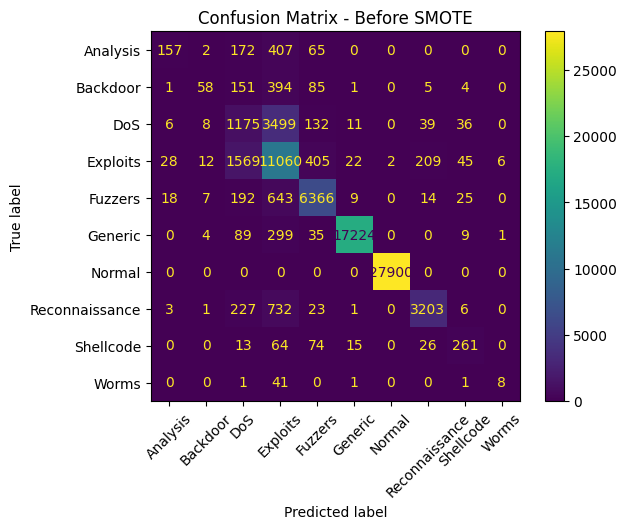

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("🔹 Baseline Model (Before SMOTE)")
print(classification_report(y_test, y_pred, target_names=le.classes_))
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, display_labels=le.classes_, xticks_rotation=45)
plt.title("Confusion Matrix - Before SMOTE")
plt.show()


Before SMOTE: [ 1874  1630 11447 31167 16972 41210 65100  9791  1058   122]
After SMOTE: [65100 65100 65100 65100 65100 65100 65100 65100 65100 65100]


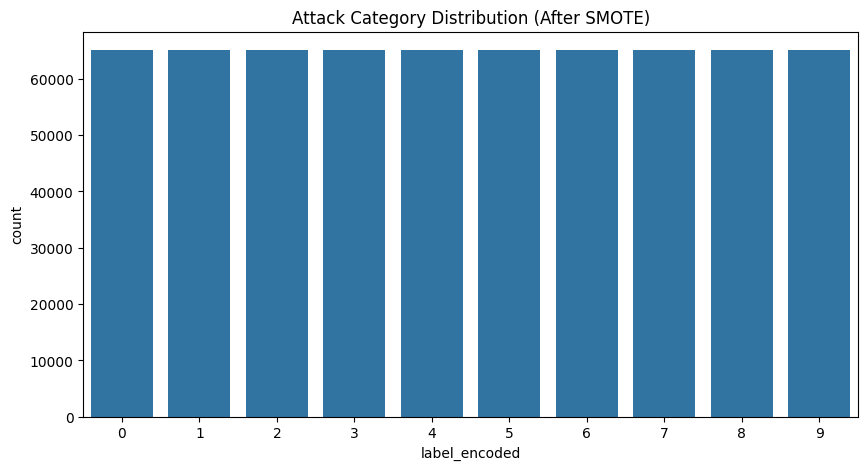

In [36]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_train_bal))

plt.figure(figsize=(10,5))
sns.countplot(x=y_train_bal)
plt.title("Attack Category Distribution (After SMOTE)")
plt.show()


🔹 Model After SMOTE
                precision    recall  f1-score   support

      Analysis       0.34      0.22      0.27       803
      Backdoor       0.17      0.10      0.13       699
           DoS       0.34      0.60      0.43      4906
      Exploits       0.76      0.62      0.68     13358
       Fuzzers       0.91      0.86      0.89      7274
       Generic       1.00      0.97      0.99     17661
        Normal       1.00      1.00      1.00     27900
Reconnaissance       0.87      0.79      0.83      4196
     Shellcode       0.46      0.73      0.57       453
         Worms       0.38      0.50      0.43        52

      accuracy                           0.86     77302
     macro avg       0.62      0.64      0.62     77302
  weighted avg       0.88      0.86      0.87     77302



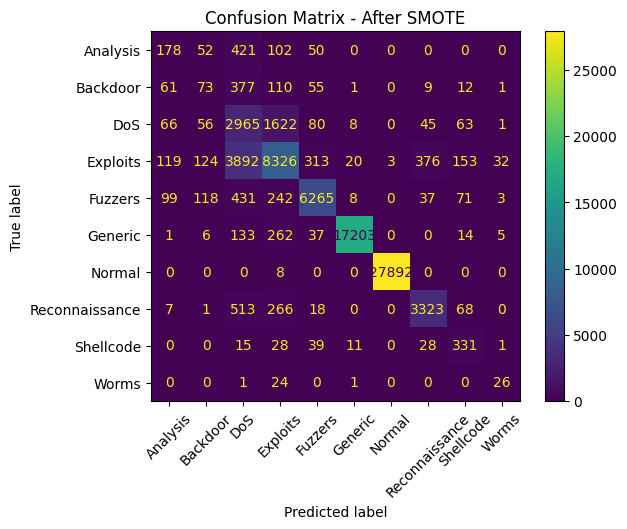

In [72]:
rf_bal = RandomForestClassifier(random_state=42)
rf_bal.fit(X_train_bal, y_train_bal)
y_pred_bal = rf_bal.predict(X_test)

print("🔹 Model After SMOTE")
print(classification_report(y_test, y_pred_bal, target_names=le.classes_))
ConfusionMatrixDisplay.from_estimator(rf_bal, X_test, y_test, display_labels=le.classes_, xticks_rotation=45)
plt.title("Confusion Matrix - After SMOTE")
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

before_metrics = precision_recall_fscore_support(y_test, y_pred, average='macro')
after_metrics  = precision_recall_fscore_support(y_test, y_pred_bal, average='macro')

comparison = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-score'],
    'Before SMOTE': before_metrics[:3],
    'After SMOTE': after_metrics[:3]
})
print(comparison)


      Metric  Before SMOTE  After SMOTE
0  Precision      0.734664     0.622428
1     Recall      0.568974     0.641146
2   F1-score      0.601700     0.621368


Before ADASYN: [ 1874  1630 11447 31167 16972 41210 65100  9791  1058   122]
After ADASYN: [65217 65246 66643 65004 66108 65195 65100 64904 65120 65151]


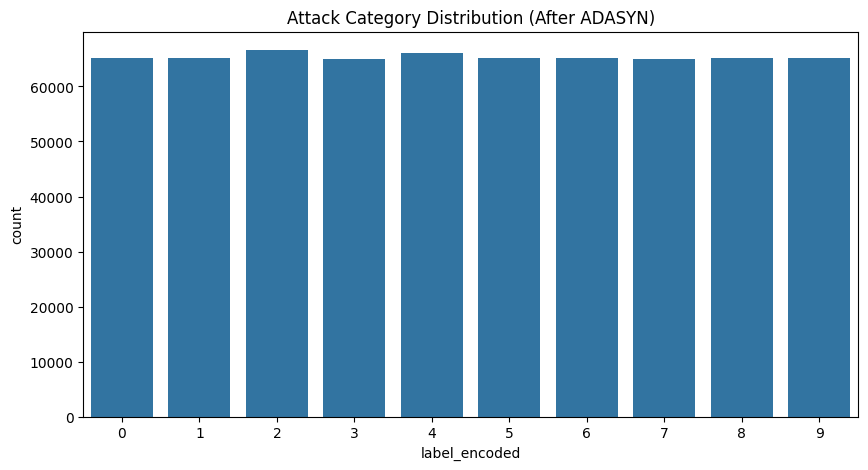

In [ ]:
from imblearn.over_sampling import ADASYN

# Apply ADASYN to training data
ada = ADASYN(random_state=42)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

print("Before ADASYN:", np.bincount(y_train))
print("After ADASYN:", np.bincount(y_train_ada))

plt.figure(figsize=(10,5))
sns.countplot(x=y_train_ada)
plt.title("Attack Category Distribution (After ADASYN)")
plt.show()


🔹 Model After ADASYN
                precision    recall  f1-score   support

      Analysis       0.35      0.22      0.27       803
      Backdoor       0.17      0.10      0.13       699
           DoS       0.35      0.55      0.43      4906
      Exploits       0.75      0.65      0.69     13358
       Fuzzers       0.90      0.87      0.88      7274
       Generic       0.99      0.98      0.99     17661
        Normal       1.00      1.00      1.00     27900
Reconnaissance       0.86      0.80      0.83      4196
     Shellcode       0.47      0.71      0.57       453
         Worms       0.41      0.56      0.48        52

      accuracy                           0.86     77302
     macro avg       0.63      0.64      0.63     77302
  weighted avg       0.88      0.86      0.87     77302



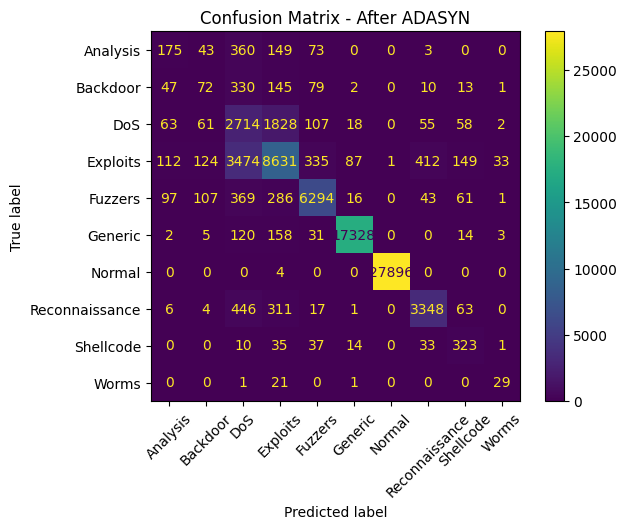

In [ ]:
rf_ada = RandomForestClassifier(random_state=42)
rf_ada.fit(X_train_ada, y_train_ada)
y_pred_ada = rf_ada.predict(X_test)

print("🔹 Model After ADASYN")
print(classification_report(y_test, y_pred_ada, target_names=le.classes_))

ConfusionMatrixDisplay.from_estimator(rf_ada, X_test, y_test, display_labels=le.classes_, xticks_rotation=45)
plt.title("Confusion Matrix - After ADASYN")
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

before_metrics = precision_recall_fscore_support(y_test, y_pred, average='macro')
smote_metrics  = precision_recall_fscore_support(y_test, y_pred_bal, average='macro')
adasyn_metrics = precision_recall_fscore_support(y_test, y_pred_ada, average='macro')

comparison_all = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-score'],
    'Before SMOTE': before_metrics[:3],
    'After SMOTE': smote_metrics[:3],
    'After ADASYN': adasyn_metrics[:3]
})

print(comparison_all)


      Metric  Before SMOTE  After SMOTE  After ADASYN
0  Precision      0.734664     0.622428      0.625547
1     Recall      0.568974     0.641146      0.643516
2   F1-score      0.601700     0.621368      0.625804


🚀 Starting optimized Random Forest tuning (this will take ~5 minutes)...
Fitting 2 folds for each of 5 candidates, totalling 10 fits

✅ Best Parameters found: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'class_weight': 'balanced_subsample'}

🔹 Model After Hyperparameter Tuning (Fast Version)
                precision    recall  f1-score   support

      Analysis       0.33      0.22      0.27       803
      Backdoor       0.17      0.11      0.13       699
           DoS       0.34      0.60      0.44      4906
      Exploits       0.76      0.62      0.68     13358
       Fuzzers       0.91      0.86      0.89      7274
       Generic       1.00      0.97      0.99     17661
        Normal       1.00      1.00      1.00     27900
Reconnaissance       0.87      0.79      0.83      4196
     Shellcode       0.46      0.75      0.57       453
         Worms       0.37      0.48      0.42        52

      accuracy                           0.86

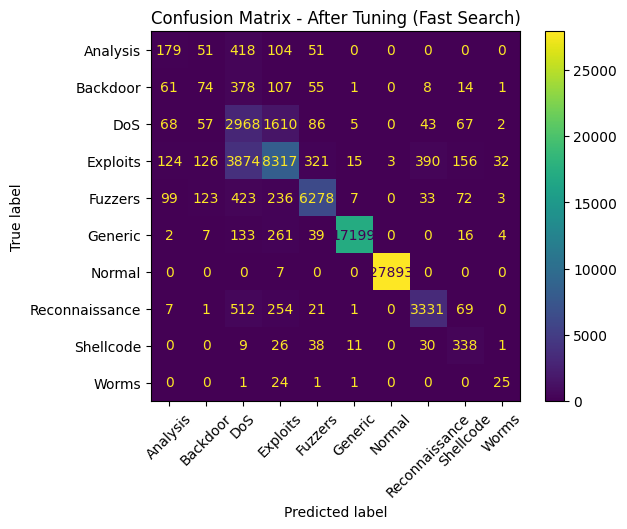

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("🚀 Starting optimized Random Forest tuning (this will take ~5 minutes)...")

# --- Parameter grid (simplified for speed) ---
param_grid = {
    'n_estimators': [100, 200],        # fewer values
    'max_depth': [10, 20, None],       # limited range
    'min_samples_split': [2, 5],       # reduced options
    'min_samples_leaf': [1, 2],        # reduced options
    'class_weight': ['balanced', 'balanced_subsample']
}

# --- Initialize smaller RF model ---
rf_tuned = RandomForestClassifier(random_state=42, n_jobs=-1)

# --- Randomized Search (faster version) ---
random_search = RandomizedSearchCV(
    estimator=rf_tuned,
    param_distributions=param_grid,
    n_iter=5,             
    scoring='f1_macro',   
    cv=2,                 
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# --- Fit on balanced data ---
random_search.fit(X_train_bal, y_train_bal)

print("\n✅ Best Parameters found:", random_search.best_params_)

# --- Evaluate tuned model ---
best_rf = random_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

print("\n🔹 Model After Hyperparameter Tuning (Fast Version)")
print(classification_report(y_test, y_pred_best, target_names=[str(c) for c in le.classes_]))

ConfusionMatrixDisplay.from_estimator(
    best_rf, X_test, y_test,
    display_labels=[str(c) for c in le.classes_],
    xticks_rotation=45
)
plt.title("Confusion Matrix - After Tuning (Fast Search)")
plt.show()



🔹 XGBoost Model After SMOTE
                precision    recall  f1-score   support

      Analysis       0.34      0.25      0.29       803
      Backdoor       0.17      0.14      0.15       699
           DoS       0.36      0.72      0.48      4906
      Exploits       0.82      0.59      0.68     13358
       Fuzzers       0.95      0.86      0.90      7274
       Generic       1.00      0.98      0.99     17661
        Normal       1.00      1.00      1.00     27900
Reconnaissance       0.88      0.79      0.83      4196
     Shellcode       0.44      0.84      0.58       453
         Worms       0.38      0.75      0.50        52

      accuracy                           0.86     77302
     macro avg       0.63      0.69      0.64     77302
  weighted avg       0.90      0.86      0.87     77302



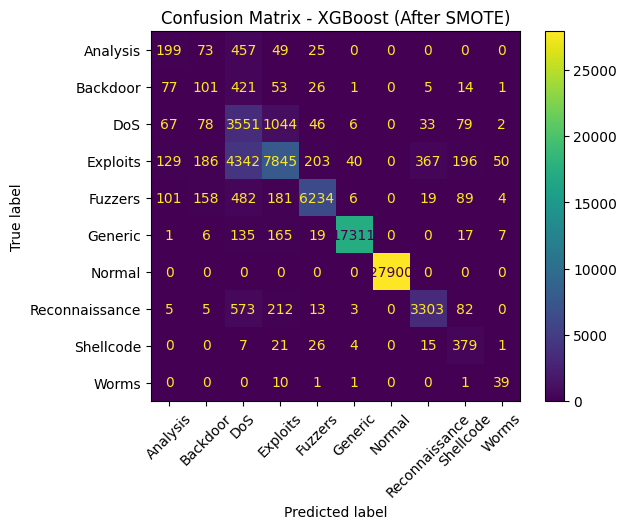

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    learning_rate=0.05,
    max_depth=10,
    n_estimators=300,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.5,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train_bal, y_train_bal)
y_pred_xgb = xgb.predict(X_test)

print("🔹 XGBoost Model After SMOTE")
print(classification_report(y_test, y_pred_xgb, target_names=[str(c) for c in le.classes_]))
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test, display_labels=le.classes_, xticks_rotation=45)
plt.title("Confusion Matrix - XGBoost (After SMOTE)")
plt.show()


In [ ]:
from sklearn.metrics import f1_score, recall_score

models = {
    "Baseline_RF": rf,
    "After_SMOTE_RF": rf_bal,
    "Tuned_RF": best_rf,
    "XGBoost": xgb
}

for name, model in models.items():
    y_pred_m = model.predict(X_test)
    print(f"\n{name}")
    print("Macro F1:", f1_score(y_test, y_pred_m, average='macro'))
    print("Macro Recall:", recall_score(y_test, y_pred_m, average='macro'))



Baseline_RF
Macro F1: 0.601700397170002
Macro Recall: 0.5689742597314621

After_SMOTE_RF
Macro F1: 0.6213681224728955
Macro Recall: 0.6411458781703824

Tuned_RF
Macro F1: 0.6205347552350962
Macro Recall: 0.6413797358340474

XGBoost
Macro F1: 0.6402361144554094
Macro Recall: 0.6914439102770684


In [ ]:

from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd


In [ ]:
X = data.drop(["label", "attack_cat"], axis=1)   # Drop target columns
y = data["label"]                                # Use binary label for classification


In [ ]:
# -------------------------
# 3. Encode categorical columns
# -------------------------
# Select categorical columns
cat_cols = X.select_dtypes(include=["object"]).columns
num_cols = X.select_dtypes(exclude=["object"]).columns

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=cat_cols)

# -------------------------
# 4. Train-test split BEFORE SMOTE
# Prevent data leakage
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------
# 5. Apply SMOTE + Tomek Links
# -------------------------
smote_tomek = SMOTETomek(random_state=42)
X_train_balanced, y_train_balanced = smote_tomek.fit_resample(X_train, y_train)

print("Before balancing:", y_train.value_counts())
print("\nAfter SMOTE + Tomek:", y_train_balanced.value_counts())

# -------------------------
# 6. OPTIONAL: Scale numerical features
# -------------------------
scaler = StandardScaler()
X_train_balanced[num_cols] = scaler.fit_transform(X_train_balanced[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Now your dataset is ready for ML modeling


Before balancing: label
1    131738
0     74400
Name: count, dtype: int64

After SMOTE + Tomek: label
1    124170
0    124170
Name: count, dtype: int64


In [ ]:
# Install the library if not installed
# !pip install imbalanced-learn

from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix

# ------------------------------------------------
# ✅ 1. Balanced Random Forest Classifier
# ------------------------------------------------
brf = BalancedRandomForestClassifier(
    n_estimators=200,
    random_state=42,
    sampling_strategy="auto"
)

brf.fit(X_train_balanced, y_train_balanced)
brf_pred = brf.predict(X_test)

print("✅ Balanced Random Forest Results")
print("----------------------------------")
print("Accuracy:", accuracy_score(y_test, brf_pred))
print("Recall:", recall_score(y_test, brf_pred))
print("Classification Report:\n", classification_report(y_test, brf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, brf_pred))



✅ Balanced Random Forest Results
----------------------------------
Accuracy: 0.9997865528281751
Recall: 0.9998481858205557
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18600
           1       1.00      1.00      1.00     32935

    accuracy                           1.00     51535
   macro avg       1.00      1.00      1.00     51535
weighted avg       1.00      1.00      1.00     51535

Confusion Matrix:
 [[18594     6]
 [    5 32930]]


In [ ]:
# ------------------------------------------------
# ✅ 2. Easy Ensemble Classifier (AdaBoost)
# ------------------------------------------------
ee = EasyEnsembleClassifier(
    n_estimators=50,
    random_state=42
)

ee.fit(X_train_balanced, y_train_balanced)
ee_pred = ee.predict(X_test)

print("\n✅ Easy Ensemble AdaBoost Results")
print("----------------------------------")
print("Accuracy:", accuracy_score(y_test, ee_pred))
print("Recall:", recall_score(y_test, ee_pred))
print("Classification Report:\n", classification_report(y_test, ee_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, ee_pred))

In [86]:
# Install needed libraries
# !pip install xgboost imbalanced-learn

from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix


# ------------------------------------------------
# ✅ 1. XGBoost Classifier
# ------------------------------------------------
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train_balanced, y_train_balanced)
xgb_pred = xgb.predict(X_test)

print("\n✅ XGBoost Results")
print("----------------------------------")
print("Accuracy :", accuracy_score(y_test, xgb_pred))
print("Recall   :", recall_score(y_test, xgb_pred))
print("Precision:", precision_score(y_test, xgb_pred))
print("F1 Score :", f1_score(y_test, xgb_pred))
print("\nClassification Report:\n", classification_report(y_test, xgb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))





✅ XGBoost Results
----------------------------------
Accuracy : 1.0
Recall   : 1.0
Precision: 1.0
F1 Score : 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18600
           1       1.00      1.00      1.00     32935

    accuracy                           1.00     51535
   macro avg       1.00      1.00      1.00     51535
weighted avg       1.00      1.00      1.00     51535

Confusion Matrix:
 [[18600     0]
 [    0 32935]]


In [87]:
gb = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb.fit(X_train_balanced, y_train_balanced)
gb_pred = gb.predict(X_test)

print("\n✅ Gradient Boosting Results")
print("----------------------------------")
print("Accuracy :", accuracy_score(y_test, gb_pred))
print("Recall   :", recall_score(y_test, gb_pred))
print("Precision:", precision_score(y_test, gb_pred))
print("F1 Score :", f1_score(y_test, gb_pred))
print("\nClassification Report:\n", classification_report(y_test, gb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_pred))


✅ Gradient Boosting Results
----------------------------------
Accuracy : 1.0
Recall   : 1.0
Precision: 1.0
F1 Score : 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18600
           1       1.00      1.00      1.00     32935

    accuracy                           1.00     51535
   macro avg       1.00      1.00      1.00     51535
weighted avg       1.00      1.00      1.00     51535

Confusion Matrix:
 [[18600     0]
 [    0 32935]]


In [ ]:
# Install if needed
# !pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# -------------------------
# Load Dataset
# -------------------------

X = data.drop(["label", "attack_cat"], axis=1)
y = data["label"]

# Convert categorical features to one-hot
cat_cols = X.select_dtypes(include=["object"]).columns
X = pd.get_dummies(X, columns=cat_cols)

# Train-test split BEFORE SMOTE
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------
# ✅ Apply SMOTE
# -------------------------
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("\nAfter SMOTE:", y_train_smote.value_counts())


Before SMOTE: label
1    69791
0    23290
Name: count, dtype: int64

After SMOTE: label
1    69791
0    69791
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import ADASYN

# -------------------------
# ✅ Apply ADASYN
# -------------------------
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

print("Before ADASYN:", y_train.value_counts())
print("\nAfter ADASYN:", y_train_adasyn.value_counts())


Before ADASYN: label
1    69791
0    23290
Name: count, dtype: int64

After ADASYN: label
1    69791
0    68070
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "n_estimators": [200, 300, 400],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "class_weight": ["balanced", "balanced_subsample"]
}

rf = RandomForestClassifier(random_state=42)

grid_rf = GridSearchCV(
    rf, param_grid, cv=3, scoring="f1", n_jobs=-1
)

grid_rf.fit(X_train_smote, y_train_smote)

print("✅ Best Random Forest Params:", grid_rf.best_params_)
print("✅ Best RF F1 Score:", grid_rf.best_score_)


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix
import pandas as pd

# -------------------------
# 1. Separate features & target
# -------------------------
X = data.drop(["label", "attack_cat"], axis=1)
y = data["label"]  # Binary or multi-class label

# -------------------------
# 2. Encode categorical columns
# -------------------------
cat_cols = X.select_dtypes(include=["object"]).columns
num_cols = X.select_dtypes(exclude=["object"]).columns

X_encoded = pd.get_dummies(X, columns=cat_cols)

# -------------------------
# 3. Train-test split BEFORE SMOTE (correct!)
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------
# 4. Scale numeric features BEFORE SMOTE
# -------------------------
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# -------------------------
# 5. SMOTE + Tomek on TRAIN only
# -------------------------
smote_tomek = SMOTETomek(random_state=42)
X_train_balanced, y_train_balanced = smote_tomek.fit_resample(X_train, y_train)

print("Before balancing:\n", y_train.value_counts())
print("\nAfter SMOTE + Tomek:\n", y_train_balanced.value_counts())



Before balancing:
 label
1    69791
0    23290
Name: count, dtype: int64

After SMOTE + Tomek:
 label
1    69674
0    69674
Name: count, dtype: int64


In [ ]:
# -------------------------
# ✅ Balanced Random Forest
# -------------------------
brf = BalancedRandomForestClassifier(
    n_estimators=200,
    random_state=42,
    sampling_strategy="auto"
)

brf.fit(X_train_balanced, y_train_balanced)
brf_pred = brf.predict(X_test)

print("\n✅ Balanced Random Forest Results")
print("----------------------------------")
print("Accuracy:", accuracy_score(y_test, brf_pred))
print("Recall (macro):", recall_score(y_test, brf_pred, average="macro"))
print("Classification Report:\n", classification_report(y_test, brf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, brf_pred))

# -------------------------
# ✅ Easy Ensemble (Boosting)
# -------------------------
ee = EasyEnsembleClassifier(
    n_estimators=50,
    random_state=42
)

ee.fit(X_train_balanced, y_train_balanced)
ee_pred = ee.predict(X_test)

print("\n✅ Easy Ensemble AdaBoost Results")
print("----------------------------------")
print("Accuracy:", accuracy_score(y_test, ee_pred))
print("Recall (macro):", recall_score(y_test, ee_pred, average="macro"))
print("Classification Report:\n", classification_report(y_test, ee_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, ee_pred))



✅ Balanced Random Forest Results
----------------------------------
Accuracy: 0.9854754845086159
Recall (macro): 0.9855084518750172
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      5823
           1       1.00      0.99      0.99     17448

    accuracy                           0.99     23271
   macro avg       0.98      0.99      0.98     23271
weighted avg       0.99      0.99      0.99     23271

Confusion Matrix:
 [[ 5739    84]
 [  254 17194]]

✅ Easy Ensemble AdaBoost Results
----------------------------------
Accuracy: 0.9740449486485325
Recall (macro): 0.9698192181741002
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      5823
           1       0.99      0.98      0.98     17448

    accuracy                           0.97     23271
   macro avg       0.96      0.97      0.97     23271
weighted avg       0.97      0.97    